In [1]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 931.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 7.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
from  chembl_webresource_client.new_client import new_client

Target_Search

In [3]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)


In [4]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
4,[],Human coronavirus 229E,Human coronavirus 229E,12.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,12.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


we'll work upon virus having target size as single protein: SARS corona virus
Hence ehere we'll rertrieve bioactivity data od SARS corornavirus here


In [5]:
selected_target = targets.target_chembl_id[6]


In [6]:
selected_target

'CHEMBL3927'

filtering single protein SARS data

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type = "IC50")#adding two filters by .filter method

In [8]:
res1 = pd.DataFrame.from_dict(res)

In [9]:
res1.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [10]:
res1.standard_type.unique()

array(['IC50'], dtype=object)

In [11]:
  res1.to_csv('bioactivity_data.csv',index = False)

In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [14]:
!mkdir "/content/gdrive/My Drive/DrugData "

mkdir: cannot create directory ‘/content/gdrive/My Drive/DrugData ’: File exists


In [15]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/DrugData"

In [16]:
!head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

Handling missing data

In [17]:
res1  = res1[res1.standard_value.notna()]
res1

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


DATA PREPROCESSING

labeing componds as active, inactive and intermediate.
active compnd of IC50 <1 means 1 micromolar = 1000 nanomolar
therefore drug having ic50 value < 1 nanomoar is active and so on

In [18]:
bioactivity_class = []
for i in res1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

iterarting molecule ids on the chembl list

In [19]:

molecule_id = []
for i in res1.assay_chembl_id:
  molecule_id.append(i)

In [20]:
molecule_id

['CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL830868',
 'CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL828143',
 'CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL829584',
 'CHEMBL880249',
 'CHEMBL880249',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL868157',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248',
 'CHEMBL871248

iterating canonical_smiles

In [21]:
canonical_smiles = []
for i in res1.canonical_smiles:
  canonical_smiles.append(i)

In [22]:
canonical_smiles

['Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21',
 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21',
 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21',
 'O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C(Nc1ccc(Cl)cc1)c1ccc(CN2C(=O)C(=O)c3cc(I)ccc32)s1',
 'O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21',
 'CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccccc1',
 'CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC=C(C)C)CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C',
 'CCCCN1C(=O)C(=O)c2cc(I)ccc21',
 'NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1',
 'NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccccc1',
 'CCCCN1C(=O)C(=O)c2cc(C(N)=O)ccc21',
 'CCCN1C(=O)C(=O)c2cc(C(N)=O)ccc21',
 'CN1C(=O)C(=O)c2cc(C(N)=O)ccc21',
 'O=C1C(=O)N(Cc2cc

In [23]:
standard_value = []
for i in res1.standard_value:
  standard_value.append(i)

In [24]:
selection = ['assay_chembl_id','canonical_smiles','standard_value']
res1= res1[selection]

In [25]:
data_tuples = list(zip(molecule_id, canonical_smiles,bioactivity_class,standard_value))
res1 = pd.DataFrame(data_tuples , columns = ['nolecule_id','canonical_smiles','bioactivity_class','standard_value'])

In [26]:
res1

,nolecule_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL829584,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL829584,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [27]:
pd.concat([res1 , pd.DataFrame(bioactivity_class)],axis =  1)

,nolecule_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL829584,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,intermediate
1,CHEMBL829584,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,intermediate
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,inactive
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,inactive
4,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,intermediate
...,...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,inactive
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,inactive
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,inactive
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,inactive


In [28]:
res1.to_csv("bioactivity_preprocessed_data.csv", index = False)

In [29]:
!cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/DrugData"

In [30]:
!ls

acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv	      __MACOSX
acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv  molecule.smi
bioactivity_data.csv						      PaDEL-Descriptor
bioactivity_preprocessed_data.csv				      padel.sh
condacolab_install.log						      padel.zip
descriptors_output.csv						      plot_bioactivity_class.pdf
gdrive								      sample_data


EDA Exploratory Data Analysis

In [31]:
!conda --version

conda 23.11.0


In [32]:
!pip install -q condacolab
import condacolab
condacolab.install()
!pip install rdkit-pypi

✨🍰✨ Everything looks OK!



lipinski descriptors
ChatGPT
The Lipinski's Rule of Five, also known simply as Lipinski descriptors or parameters, are a set of rules used to evaluate the drug-likeness of chemical compounds in drug discovery and medicinal chemistry. These rules were formulated by Christopher Lipinski and are based on the observation of properties shared by many orally active drugs. The rules are:

Molecular weight: The molecular weight should be less than 500 daltons.

Octanol-water partition coefficient (LogP): The LogP should be less than 5.

Hydrogen bond donors: The number of hydrogen bond donors should be less than 5.

Hydrogen bond acceptors: The number of hydrogen bond acceptors should be less than 10.

In [33]:
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import  Descriptors, Lipinski


In [34]:
df = pd.read_csv('/content/bioactivity_preprocessed_data.csv')


Compute Descriptors

In [35]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):
    moldata = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i)
        moldata.append(mol)

    baseData = np.array([])
    j = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        if j == 0:
            baseData = row
        else:
            baseData = np.vstack((baseData, row))
        j += 1

    ColumnName = ["Mw", "LogP", "NumHDonor", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=ColumnName)
    return descriptors


In [36]:
df_lipinski = lipinski(df.canonical_smiles)

In [37]:
df_lipinski

,Mw,LogP,NumHDonor,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [38]:
res1

,nolecule_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL829584,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL829584,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


concatenating res1 and df_lipinski

In [39]:
df_combined = pd.concat([res1 , df_lipinski] , axis = 1)

In [40]:
df_combined

,nolecule_id,canonical_smiles,bioactivity_class,standard_value,Mw,LogP,NumHDonor,NumHAcceptors
0,CHEMBL829584,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL829584,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,338.359,3.40102,0.0,5.0
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,296.366,3.44330,0.0,3.0
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,276.291,4.09564,0.0,3.0
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,278.307,3.29102,0.0,3.0


conversion  of IC50 scale to PIC50 scale

In [41]:
import numpy as np
def pic50(input):
  pic50 = []
  for i in input['standard_value_norm']:
    molar = i*(10**-9)
    pic50.append(-np.log10(molar))
  input['pic50'] = pic50
  x = input.drop('standard_value_norm',1)

  return x

In [42]:
df_combined.standard_value.describe()

count         133
unique         93
top       15000.0
freq            5
Name: standard_value, dtype: object

In [43]:
def norm_value(input):
    # Convert 'standard_value' column to numeric type
    input['standard_value'] = pd.to_numeric(input['standard_value'], errors='coerce')

    # Replace values > 100000000 with 100000000
    input.loc[input['standard_value'] > 100000000, 'standard_value'] = 100000000

    # Create a new column 'standard_value_norm' with normalized values
    input['standard_value_norm'] = input['standard_value']

    # Drop the original 'standard_value' column
    x = input.drop('standard_value', axis=1)

    return x

In [44]:
df_norm = norm_value(df_combined)
df_norm

,nolecule_id,canonical_smiles,bioactivity_class,Mw,LogP,NumHDonor,NumHAcceptors,standard_value_norm
0,CHEMBL829584,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL829584,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [45]:
df_final = pic50(df_norm)
df_final



<ipython-input-41-8bc3988d3ad4>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm',1)


,nolecule_id,canonical_smiles,bioactivity_class,Mw,LogP,NumHDonor,NumHAcceptors,pic50
0,CHEMBL829584,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL829584,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


removing the intermediate bioactivity classes

In [46]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,nolecule_id,canonical_smiles,bioactivity_class,Mw,LogP,NumHDonor,NumHAcceptors,pic50
2,CHEMBL830868,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL828143,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL829584,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2150313,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL2150313,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL2150313,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL2150313,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


EDA

In [47]:
import seaborn as sns#helps to look into the  chemical space hance allows chemical space analysis
sns.set(style = 'ticks')
import matplotlib.pyplot as plt


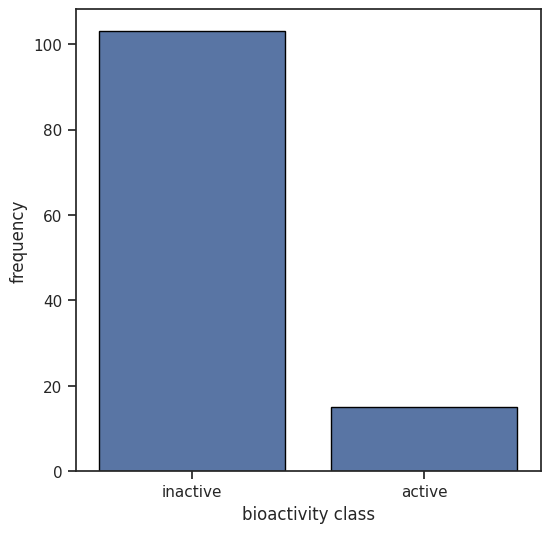

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x='bioactivity_class', data = df_2class, edgecolor= 'black')
plt.xlabel ('bioactivity class', fontsize = 12 )
plt.ylabel('frequency',fontsize = 12)
plt.show()
plt.savefig('plot_bioactivity_class.pdf')

In [49]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


--2024-02-18 18:28:09--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-02-18 18:28:09--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M   135MB/s    in 0.2s    

2024-02-18 18:28:10 (135 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2024-02-18 18:28:10--  https://gi

In [51]:
import pandas as pd

loading bioactivity data

In [52]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv


--2024-02-18 18:32:41--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.04s   

2024-02-18 18:32:42 (14.8 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1’ saved [655414/655414]



In [53]:
df3 = pd.read_csv('/content/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [54]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
4690,4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.150,7.07230,2.0,3.0,5.612610
4691,4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.150,7.07230,2.0,3.0,5.595166
4692,4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.601,7.18140,2.0,3.0,5.419075
4693,4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.702,6.32710,2.0,5.0,5.460924


In [55]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep ='\t',index = False , header = False)

In [56]:
df3_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
4690,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,CHEMBL4293155
4691,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,CHEMBL4282558
4692,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,CHEMBL4281727
4693,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,CHEMBL4292349


Calculate PaDEL Descriptors

PaDEL (Prediction of Activity Spectra for Substances) is a popular software for calculating molecular descriptors. Here's a general approach to calculate PaDEL descriptors using RDKit:

In [57]:
!cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [58]:
#!bash padel.sh

In [59]:
!ls -l

total 61244
-rw-r--r-- 1 root root   655414 Feb 18 18:23 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   655414 Feb 18 18:32 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1
-rw-r--r-- 1 root root  7311545 Feb 18 18:27 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root    68403 Feb 18 18:27 bioactivity_data.csv
-rw-r--r-- 1 root root    10377 Feb 18 18:28 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root    22537 Feb 18 18:22 condacolab_install.log
-rw-r--r-- 1 root root  2084897 Feb 18 18:27 descriptors_output.csv
drwx------ 5 root root     4096 Feb 18 18:28 gdrive
drwxr-xr-x 3 root root     4096 Feb 18 18:23 __MACOSX
-rw-r--r-- 1 root root   310658 Feb 18 18:32 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Feb 18 18:23 padel.sh
-rw-r--r-- 1 root root      231 Feb 18 18:28 padel.sh.1
-rw-r--r-- 1 root root 25768637 Feb 18 18:23 pade

X DATA Y DATA

In [60]:
df3_X = pd.read_csv('descriptors_output.csv')

In [61]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,CHEMBL221794,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1163,CHEMBL278193,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,CHEMBL376011,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1165,CHEMBL376012,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:

df3_X = df3_X.drop(columns=['Name'])
df3_X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1163,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1164,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1165,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:

df3_Y = df3['pIC50']
df3_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [64]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.612610
4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.595166
4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419075
4693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.460924


In [65]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)


Dataset Preparationa

In [66]:
import pandas as pd
import seaborn as sns

In [67]:
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Loading dataset

In [68]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-02-18 18:32:45--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2024-02-18 18:32:46--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [69]:
df = pd.read_csv('/content/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

Displaying input features, Input features are fingerprints of the drugs showing their uniqueness , we'll take target as pic50  value which is negative log of ic50 value

In [70]:
print(df)

      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            1.0         1.0         1.0         0.0         0.0         0.0   
1            1.0         1.0         1.0         0.0         0.0         0.0   
2            1.0         1.0         1.0         0.0         0.0         0.0   
3            1.0         1.0         0.0         0.0         0.0         0.0   
4            1.0         1.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
4690         NaN         NaN         NaN         NaN         NaN         NaN   
4691         NaN         NaN         NaN         NaN         NaN         NaN   
4692         NaN         NaN         NaN         NaN         NaN         NaN   
4693         NaN         NaN         NaN         NaN         NaN         NaN   
4694         NaN         NaN         NaN         NaN         NaN         NaN   

      PubchemFP6  PubchemFP7  PubchemFP

In [99]:
#removing the pic50 columns
import numpy as np

X= df.drop('pIC50', axis = 1)

X[np.isnan(X)] = 1
X.size

4136295

In [100]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4691,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4692,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4693,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [101]:
#output = target
Y = df.pIC50

In [102]:
Y.size


4695

In [103]:
#Removing low variance
'''used to remove features (columns) from a dataset that have low variance, essentially filtering out those features that don't vary much across samples.'''

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape


(4695, 682)

In [104]:
#splitting data# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [105]:
Y_train.shape

(3756,)

Model Building

In [119]:
model = RandomForestRegressor(n_estimators = 100,min_samples_split=2, bootstrap=True)
model.fit(X_train ,Y_train )



RandomForestRegressor()

In [120]:
#determining the metric score
r2 = model.score(X_test, Y_test)
r2

0.12881643412056765

In [121]:
Y_pred = model.predict(X_test)

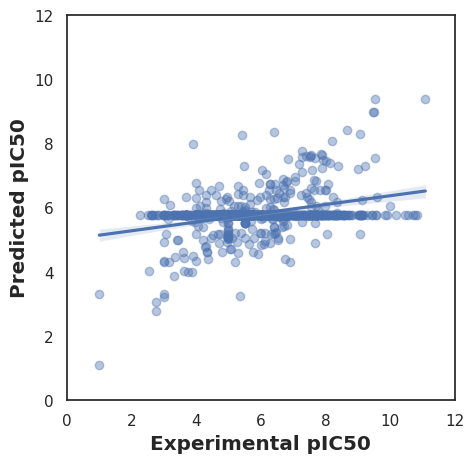

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Assuming Y_test and Y_pred are your test and predicted values respectively
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()
